In [1]:
#Enabling to import files from drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# importing the required libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
#from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [0]:
#importing libraries for the required input file extraction
import h5py
import numpy as np
# Open the file as readonly
h5f=h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

In [0]:
# Load the training, test and validation set
X_train=h5f['X_train'][:]
y_train1=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test1=h5f['y_test'][:]

# Close the file
h5f.close()

In [10]:
#Summary of Train and Test data
print ('Training input attributes size')
print(X_train.shape)
print('Training Target shape ')
print(y_train1.shape)
print ('Test input attributes size')
print(X_test.shape)
print('Test Target shape ')
print(y_test1.shape)


Training input attributes size
(42000, 32, 32)
Training Target shape 
(42000,)
Test input attributes size
(18000, 32, 32)
Test Target shape 
(18000,)


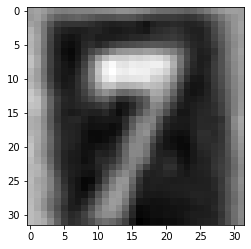

In [13]:
#Checking some random records to understand the data
plt.imshow(X_train[2,:,:],cmap='gray')

In [15]:
#Checking one of the output record
y_train1[2]

7

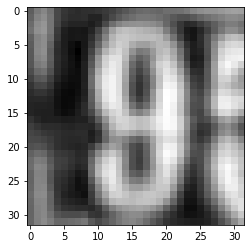

In [16]:
#Checking some random records to understand the data
plt.imshow(X_test[3,:,:],cmap='gray')

In [17]:
#Checking some random records to understand the data
y_train1[:2]

array([2, 6], dtype=uint8)

In [18]:
# Understanding the distribution of output 
L=pd.DataFrame(y_train1)
L[0].value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
8    4188
4    4188
0    4186
1    4172
6    4168
Name: 0, dtype: int64

In [19]:
# UNique output values 
import numpy as np
np.random.seed(110) 
np.unique(y_train1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=X_train.reshape(X_train.shape[0],1024).astype('float32')
x_test=X_test.reshape(X_test.shape[0],1024).astype('float32')

In [21]:
# Data count post sampling
print (x_train.shape)
print (x_test.shape)

(42000, 1024)
(18000, 1024)


In [0]:
# Normalize both the train and test image data from 0-255 to 0-1
x_train/=255
x_test/=255

In [23]:
#Encoding the output class label to one hot vectors
y_train=np_utils.to_categorical(y_train1,10)
y_test=np_utils.to_categorical(y_test1,10)
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [24]:
# Building the model for required results
model=Sequential()

In [0]:
model.add(Dense(1024,activation='relu'))
model.add(Dense(100, activation ='relu'))

In [0]:
model.add(Dense(10,activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.fit(x_train,y_train,batch_size=200,nb_epoch=12,verbose=1,validation_data=(x_test,y_test))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 42000 samples, validate on 18000 samples
Epoch 1/12





42000/42000 [==============================] - 11s 253us/step - loss: 0.3415 - acc: 0.8981 - val_loss: 0.3244 - val_acc: 0.9000
Epoch 2/12
42000/42000 [==============================] - 10s 232us/step - loss: 0.2738 - acc: 0.9057 - val_loss: 0.2286 - val_acc: 0.9153
Epoch 3/12
42000/42000 [==============================] - 10s 236us/step - loss: 0.2060 - acc: 0.9253 - val_loss: 0.1803 - val_acc: 0.9370
Epoch 4/12
42000/42000 [==============================] - 10s 235us/step - loss: 0.1770 - acc: 0.9380 - val_loss: 0.1682 - val_acc: 0.9421
Epoch 5/12
42000/42000 [==============================] - 10s 234us/step - loss: 0.1605 - acc: 0.9443 - val_loss: 0.1477 - val_acc: 0.9490
Epoch 6/12
42000/42000 [==============================] - 10s 233us/step - loss: 0.1489 - acc: 0.9480 - val_loss: 0.1446 - val_acc: 0.9497
Epoch 7/12
42000/42000 [==============================] - 10s 233us/step - loss: 0.1406 - acc: 0.9508 - val_